In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
%matplotlib notebook


In [2]:
grad1= "data_files/grad_rates.xlsx"
ratio1="data_files/teacher_student_ratio.xlsx"
ratio2="data_files/Ratios.csv"
grad2= "data_files/grad_rates.xlsx"
gradrate2=pd.read_excel(grad2, index_col="States")
teachratio2=pd.read_csv(ratio2, index_col="States")

In [3]:
gradrate2 = gradrate2.T
gradrate2.head()
teachratio2 = teachratio2.T
teachratio2.head()

States,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Ratio10,7.760581,7.941102,7.297717,11.092164,6.678885,11.859585,8.314572,6.021682,7.853091,6.263355,...,6.453191,7.702404,7.417460,11.187261,5.239754,6.224609,10.057421,7.203399,8.395364,5.419487
Ratio11,15.368531,15.603088,16.217743,21.266059,14.216360,23.401909,17.768403,12.656989,15.016053,11.772904,...,13.844387,15.059768,15.420130,23.058917,10.749801,13.848489,19.681468,13.970634,15.487707,11.482099
Ratio12,15.500294,14.353834,17.116105,22.293100,14.243679,23.659479,17.651868,12.541255,13.938209,12.850416,...,13.978202,14.960885,15.511079,23.047058,10.666045,14.156375,19.585067,14.080985,15.159412,12.454249
Ratio13,15.529901,15.822222,16.578841,22.797228,14.026234,24.325557,17.484951,12.572770,14.027073,13.044131,...,13.763942,15.088812,15.403490,22.955292,10.589408,14.138285,19.300137,14.063356,15.081252,12.273947
Ratio14,15.537920,17.412726,16.906128,23.100405,13.855954,23.580553,17.299859,12.901878,13.892162,12.331196,...,13.832829,15.235168,15.291896,23.218273,10.550248,14.231562,18.027711,13.995144,14.927916,12.353521


In [4]:
gradrate=pd.read_excel(grad1)
teachratio=pd.read_excel(ratio1)

In [5]:
teachratio.head()

,STATE,Staff07,Enrollment07,Ratio07,Staff08,Enrollment08,Ratio08,Staff09,Enrollment09,Ratio09,...,Ratio13,Staff14,Enrollment14,Ratio14,Staff15,Enrollment15,Ratio15,Staff16,Enrollment16,Ratio16
0,Alabama,111656,744865,6.671070,95368,745668,7.818849,94058.04,748889,7.961988,...,15.822222,42736.79,744164,17.412726,40766.22,743789,18.245229,42532.95,744930,17.514186
1,Alaska,16593,131029,7.896643,17160,130662,7.614336,17742.60,131661,7.420615,...,16.578841,7759.08,131176,16.906128,7832.15,132477,16.914513,7824.91,132737,16.963390
2,Arizona,104670,1087447,10.389290,105548,1087817,10.306372,100320.10,1077831,10.743919,...,22.797228,48124.48,1111695,23.100405,47943.56,1109040,23.132200,48220.08,1123137,23.291894
3,Arkansas,70331,479016,6.810880,71270,478965,6.720429,74311.00,480559,6.466862,...,14.026234,35430.04,490917,13.855954,35803.87,492132,13.745218,35730.30,493447,13.810323
4,California,583625,6343471,10.869087,585684,6322528,10.795118,609654.80,6263438,10.273745,...,24.325557,267685.03,6312161,23.580553,263474.93,6305347,23.931488,271287.08,6309138,23.256316


In [6]:
ratiorate=teachratio[['STATE','Ratio10','Ratio11','Ratio12','Ratio13','Ratio14','Ratio15','Ratio16']]


In [7]:
r10=ratiorate['Ratio10'].mean()
r11=ratiorate['Ratio11'].mean()
r12=ratiorate['Ratio12'].mean()
r13=ratiorate['Ratio13'].mean()
r14=ratiorate['Ratio14'].mean()
r15=ratiorate['Ratio15'].mean()
r16=ratiorate['Ratio16'].mean()
ratiorate1 = pd.DataFrame({'STATE' : 'United States' , 'Ratio10': r10, 'Ratio11':r11, 'Ratio12':r12, 'Ratio13':r13, 'Ratio14':r14,'Ratio15':r15,'Ratio16':r16},index=[0])
ratiorate1

,STATE,Ratio10,Ratio11,Ratio12,Ratio13,Ratio14,Ratio15,Ratio16
0,United States,7.760581,15.368531,15.500294,15.529901,15.53792,15.444138,15.46081


In [8]:
# df = pd.concat([new_row, df]).reset_index(drop = True)

new_df = pd.concat([ratiorate1,ratiorate]).reset_index(drop=True)
new_df.head()

,STATE,Ratio10,Ratio11,Ratio12,Ratio13,Ratio14,Ratio15,Ratio16
0,United States,7.760581,15.368531,15.500294,15.529901,15.537920,15.444138,15.460810
1,Alabama,7.941102,15.603088,14.353834,15.822222,17.412726,18.245229,17.514186
2,Alaska,7.297717,16.217743,17.116105,16.578841,16.906128,16.914513,16.963390
3,Arizona,11.092164,21.266059,22.293100,22.797228,23.100405,23.132200,23.291894
4,Arkansas,6.678885,14.216360,14.243679,14.026234,13.855954,13.745218,13.810323


In [9]:
new_df=new_df.rename(columns={"STATE": "States"})
export_csv = new_df.to_csv (r'C:\Users\steel\Desktop\Ratios.csv', index = None, header=True)
new_df = new_df.drop(new_df.index[0])
new_df.head()

,States,Ratio10,Ratio11,Ratio12,Ratio13,Ratio14,Ratio15,Ratio16
1,Alabama,7.941102,15.603088,14.353834,15.822222,17.412726,18.245229,17.514186
2,Alaska,7.297717,16.217743,17.116105,16.578841,16.906128,16.914513,16.963390
3,Arizona,11.092164,21.266059,22.293100,22.797228,23.100405,23.132200,23.291894
4,Arkansas,6.678885,14.216360,14.243679,14.026234,13.855954,13.745218,13.810323
5,California,11.859585,23.401909,23.659479,24.325557,23.580553,23.931488,23.256316


In [10]:
gradrate=gradrate.drop(gradrate.index[0])
gradrate.head()

,States,2010,2011,2012,2013,2014,2015,2016
1,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0
2,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0
3,Arizona,78.0,76.0,75.1,76.0,77.4,80.0,78.0
4,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0
5,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0


In [11]:
gradvsrat = pd.merge(gradrate,new_df, on=["States"])
gradvsrat.head()


,States,2010,2011,2012,2013,2014,2015,2016,Ratio10,Ratio11,Ratio12,Ratio13,Ratio14,Ratio15,Ratio16
0,Alabama,72.0,75.0,80.0,75.0,89.3,87.0,89.0,7.941102,15.603088,14.353834,15.822222,17.412726,18.245229,17.514186
1,Alaska,68.0,70.0,71.8,70.0,75.6,76.0,78.0,7.297717,16.217743,17.116105,16.578841,16.906128,16.914513,16.963390
2,Arizona,78.0,76.0,75.1,76.0,77.4,80.0,78.0,11.092164,21.266059,22.293100,22.797228,23.100405,23.132200,23.291894
3,Arkansas,81.0,84.0,84.9,84.0,84.9,87.0,88.0,6.678885,14.216360,14.243679,14.026234,13.855954,13.745218,13.810323
4,California,76.0,79.0,80.4,79.0,82.0,83.0,83.0,11.859585,23.401909,23.659479,24.325557,23.580553,23.931488,23.256316


In [12]:
export_csv = gradvsrat.to_csv (r'C:\Users\steel\Desktop\gradvsrat.csv', index = None, header=True)


-0.349579967463621


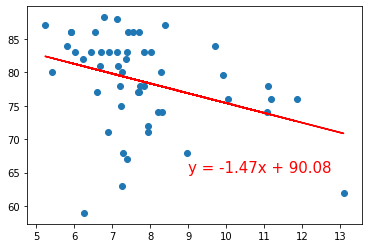

In [13]:
rat10 = gradvsrat[2010]
r10 = gradvsrat['Ratio10']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r10,rat10)
regress_values10 = r10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r10,regress_values10,"r-")
plt.annotate(line_eq,(9,65),fontsize=15,color="red")
sc = plt.scatter(r10,rat10)
print(rvalue)
plt.show()


-0.33387075361301305


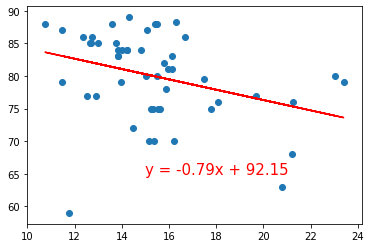

In [14]:
rat11 = gradvsrat[2011]
r11 = gradvsrat['Ratio11']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r11,rat11)
regress_values11 = r11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r11,regress_values11,"r-")
plt.annotate(line_eq,(15,65),fontsize=15,color="red")
plt.scatter(r11,rat11)
print(rvalue)
plt.show()

-0.37900835717736664


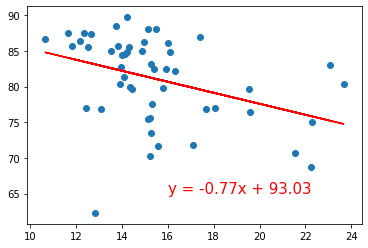

In [15]:
rat12 = gradvsrat[2012]
r12 = gradvsrat['Ratio12']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r12,rat12)
regress_values12 = r12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r12,regress_values12,"r-")
plt.annotate(line_eq,(16,65),fontsize=15,color="red")
plt.scatter(r12,rat12)
print(rvalue)
plt.show()

-0.3871913896170173


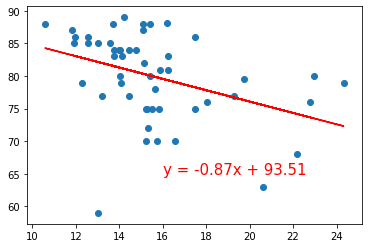

In [16]:
rat13 = gradvsrat[2013]
r13 = gradvsrat['Ratio13']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r13,rat13)
regress_values13 = r13 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r13,regress_values13,"r-")
plt.annotate(line_eq,(16,65),fontsize=15,color="red")
plt.scatter(r13,rat13)
print(rvalue)
plt.show()

-0.36790336431815734


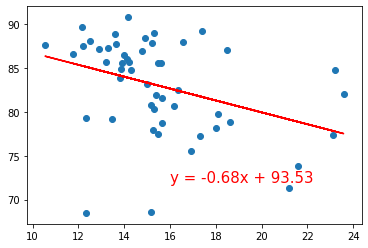

In [17]:
rat14 = gradvsrat[2014]
r14 = gradvsrat['Ratio14']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r14,rat14)
regress_values14 = r14 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r14,regress_values14,"r-")
plt.annotate(line_eq,(16,72),fontsize=15,color="red")
plt.scatter(r14,rat14)
print(rvalue)
plt.show()

-0.32296004769159364


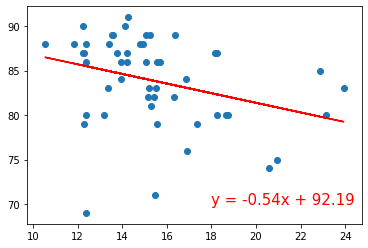

In [18]:
rat15 = gradvsrat[2015]
r15 = gradvsrat['Ratio15']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r15,rat15)
regress_values15 = r15 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r15,regress_values15,"r-")
plt.annotate(line_eq,(18,70),fontsize=15,color="red")
plt.scatter(r15,rat15)
print(rvalue)
plt.show()

-0.41339103072157923


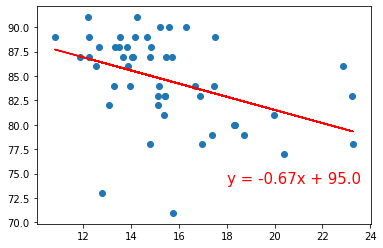

In [19]:
rat16 = gradvsrat[2016]
r16 = gradvsrat['Ratio16']
st = gradvsrat['States']

(slope, intercept, rvalue, pvalue, stderr) = linregress(r16,rat16)
regress_values16 = r16 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(r16,regress_values16,"r-")
plt.annotate(line_eq,(18,74),fontsize=15,color="red")
plt.scatter(r16,rat16)
print(rvalue)
plt.show()

In [24]:
gradrate2 = gradrate2.T
teachratio2 = teachratio2.T

-0.38561399153357556


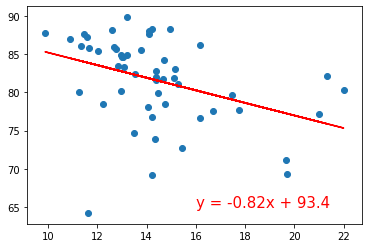

In [28]:
gradrate2['Agg'] = gradrate2.mean(axis=1)
teachratio2['Agg']=teachratio2.mean(axis=1)
ya = gradrate2['Agg']
xa = teachratio2['Agg']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xa,ya)
regress_valuesA = xa * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xa,regress_valuesA,"r-")
plt.annotate(line_eq,(16,65),fontsize=15,color="red")
plt.scatter(xa,ya)
print(rvalue)
plt.show()

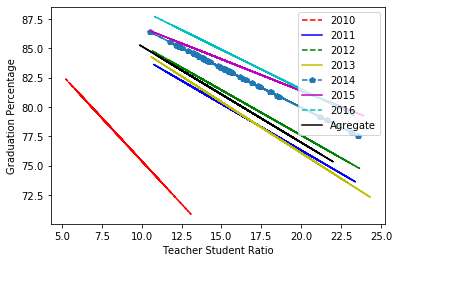

In [26]:
plt.plot(r10,regress_values10,"r-",linestyle='dashed', label="2010")
plt.plot(r11,regress_values11,"b-", label="2011")
plt.plot(r12,regress_values12,"g-", linestyle='dashed', label="2012")
plt.plot(r13,regress_values13,"y-", label="2013")
plt.plot(r14,regress_values14,"p-", linestyle='dashed', label="2014")
plt.plot(r15,regress_values15,"m-", label="2015")
plt.plot(r16,regress_values16,"c-", linestyle='dashed', label="2016")
plt.plot(xa,regress_valuesA,"k-", label="Agregate")
plt.annotate(line_eq,(15,65),fontsize=25,color="red")
plt.legend()
plt.xlabel('Teacher Student Ratio')
plt.ylabel('Graduation Percentage') 


plt.show()

In [29]:
y = gradrate2['United States']
x = teachratio2['United States']
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

KeyError: 'United States'

In [30]:
names = gradrate2.columns
for x in names:
    plt.plot(teachratio2[x],gradrate2[x], label = x)
    plt.legend()


KeyError: 2010